In [3]:
import torch
from scipy.stats import multivariate_normal
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.neighbors import BallTree
from dciknn_cuda import DCI, MDCI


import matplotlib.pyplot as plt
%matplotlib inline

def normalize_2nd_moment(x, dim=1, eps=1e-8):
    x = torch.from_numpy(x)
    yo = x * (x.square().mean(dim=dim, keepdim=True) + eps).rsqrt()
    yo = yo.numpy()
    return yo



In [4]:
d = 1024
mu = np.zeros(d)  # mean
covariance_matrix = np.eye(d)  # covariance matrix
z = np.random.normal(0,1,(100,d)) # sample
pdf_values = multivariate_normal.logpdf(z, mean=mu, cov=covariance_matrix)
print(pdf_values.mean())


-1456.2075849246532


In [6]:
a = torch.load("./new-vanilla-results/ffhq-og-no-snoise-10ff/train/latent/0-0.npy").numpy()
lolo = np.linalg.norm(a, axis=1)
print(lolo.mean())

31.720066


In [18]:
dci_db = MDCI(1024, 2, 7)


def pdf_test(directory):
    mean = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            pdf_values = multivariate_normal.logpdf(a, mean=mu, cov=covariance_matrix)
            mean.append(pdf_values.mean())
        except:
            pass
    return np.array(mean).mean()

def pdf_test2(directory):
    mean = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            pdf_values = np.power(np.linalg.norm(a, axis=1),2)
            mean.append(pdf_values.mean())
        except:
            pass
    return np.array(mean).mean()




def pdf_test3(directory):
    array = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            array.append(a)
        except:
            pass
    final_array = np.array(array)
    var_array = np.var(final_array, axis=0)
    return var_array.mean()


def pdf_test4(directory):
    mean = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            pdf_values = np.abs(np.power(np.linalg.norm(a, axis=1),2) - 1024 )
            mean.append(pdf_values.mean())
        except:
            pass
    return np.array(mean).mean()

def pdf_test5(directory):
    mean = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            mean.append(a)
        except:
            pass

    mean_z = np.array(mean).mean(axis=0)
    norm_z = np.linalg.norm(mean_z, axis=1)
    return norm_z.mean()

def pdf_test6(directory, random_samples):
    mean = []
    for i in tqdm(range(13000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            mean.append(a)
        except:
            pass

    mean_z = np.concatenate(mean)
    tree = BallTree(mean_z)
    dist, ind = tree.query(random_samples, k=1)
    return dist        

def pdf_test_pca(directory):
    mean = []
    for i in tqdm(range(10000,15000,1)):
        try:
            a = torch.load(f"./new-vanilla-results/{directory}/train/latent/0-{i}.npy").numpy()
            mean.append(a)
        except:
            pass
    
    mean_z = np.concatenate(mean)
    pca = PCA(n_components=2)
    pca.fit(mean_z)
    tranformed = pca.transform(mean_z)
    return tranformed, pca

In [6]:
pdf_test_now = pdf_test_pca
random_samples = np.random.normal(0,1,(3000,d))

og, og_pca = pdf_test_now("ffhq-og-no-snoise-10ff")
eps18, eps18_pca = pdf_test_now("ffhq-og-no-snoise-10ff-eps-18")
eps15, eps15_pca = pdf_test_now("ffhq-og-no-snoise-10ff-eps-15")
eps12, eps12_pca = pdf_test_now("ffhq-og-no-snoise-10ff-eps-12")


100%|██████████| 5000/5000 [00:00<00:00, 45717.57it/s]


In [7]:
print(og_pca.explained_variance_ratio_, eps18_pca.explained_variance_ratio_, eps15_pca.explained_variance_ratio_, eps12_pca.explained_variance_ratio_)

[0.00127335 0.00126007] [0.00126225 0.00125993] [0.00126463 0.00125731] [0.00126908 0.0012557 ]


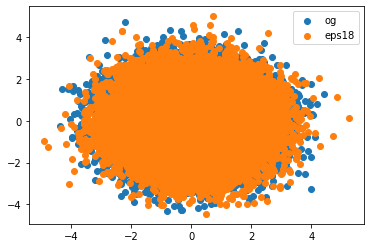

In [8]:
plt.scatter(og[:,0], og[:,1], label="og")
plt.scatter(eps18[:,0], eps18[:,1], label="eps18")
# plt.scatter(eps15[:,0], eps15[:,1], label="eps15")
# plt.scatter(eps12[:,0], eps12[:,1], label="eps12")
plt.legend()
plt.show()


In [9]:
pdf_test_now = pdf_test6
random_samples = np.random.normal(0,1,(3000,d))

og = pdf_test_now("ffhq-og-no-snoise-10ff", random_samples)
eps18 = pdf_test_now("ffhq-og-no-snoise-10ff-eps-18", random_samples)
eps15 = pdf_test_now("ffhq-og-no-snoise-10ff-eps-15", random_samples)
eps12 = pdf_test_now("ffhq-og-no-snoise-10ff-eps-12", random_samples)


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 55305.74it/s]


In [ ]:
np.mean(og,axis=0), np.mean(eps12,axis=0), np.mean(eps15,axis=0), np.mean(eps18,axis=0)

(array([41.87654564]),
 array([41.89310766]),
 array([41.85654228]),
 array([41.87095356]))

In [ ]:
np.median(og,axis=0), np.median(eps12,axis=0), np.median(eps15,axis=0), np.median(eps18,axis=0)

(array([41.8732755]),
 array([41.89452892]),
 array([41.86102767]),
 array([41.87341438]))

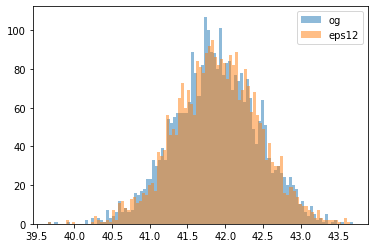

In [ ]:
plt.hist(og, bins=100, alpha=0.5, label='og')
plt.hist(eps12, bins=100, alpha=0.5, label='eps12')
# plt.hist(eps15, bins=100, alpha=0.5, label='eps15')
# plt.hist(eps18, bins=100, alpha=0.5, label='eps18')
plt.legend(loc='upper right')


In [19]:
pdf_test_now = pdf_test5

In [24]:
print(pdf_test_now("ffhq-og-no-snoise-10ff"))
print(pdf_test_now("ffhq-og-no-snoise-10ff-eps-12"))
print(pdf_test_now("ffhq-og-no-snoise-10ff-eps-15"))
print(pdf_test_now("ffhq-og-no-snoise-10ff-eps-18"))

100%|██████████| 5000/5000 [00:00<00:00, 47581.01it/s]


2.7079334


100%|██████████| 5000/5000 [00:00<00:00, 47619.58it/s]


2.6480572


100%|██████████| 5000/5000 [00:00<00:00, 50835.00it/s]


2.64489


100%|██████████| 5000/5000 [00:00<00:00, 47280.86it/s]

2.6440024
